# Computação Evolucionária - TP PSO

## Introdução

O Particle Swarm Optimization (PSO) é um método evolucionário e estocástico de otimização global baseado no movimento e inteligência de populações, no qual cada um indivíviduo tenta imitar o sucesso dos seus vizinhos. Em cada iteração, a posição de cada indivídio, ou partícula, é atualizada considerando as seguintes regras:

1. Inércia: partículas possuem tendência a se mover na mesma direção anterior
2. Memória: partículas possuem tendência a se mover em direção ao melhor ponto encontrado na sua experiência pessoal
3. Cooperação: partículas possuem tendência a se mover em direção ao melhor ponto encontrado pelo grupo ou vizinhança

Em geral, a regra de atualização da posição para uma partícula $i$ é dada pela seguinte relação:

$x_i(t+1) = x_i(t) + v_i(t + 1)$                                                                                        

Um modelo de atualização comumente encontrado na literatura para atualizar a velocidade $v(t)$ pode ser descrito como:

$v_i(t+1) = \chi[\omega v_i(t) + c_1r_1 \circ (p_i(t) - x_i(t)) + c_2r_2 \circ (g_i(t) - x_i(t))]$                      

onde $\chi$ é o parâmetro de constrição, $\omega$ o peso de Inércia, $c1$ e $c_2$ são os coeficientes de aceleração. O termo $ c_1r_1 \circ (p_i(t) - x_i(t))$ é conhecido como a componente coginitiva, a qual corresponde à memória do melhor desempenho de uma determinada partícula. Já o termo $c_2r_2 \circ (g_i(t) - x_i(t))$ é conhecido como a componente social, o qual quantifica o desempenho de uma partícula em relação ao grupo.

Os valores de $g_i(t)$ dependem da estrutura de vizinhança adotada para o algoritmo. Duas abordages comuns são global best e local best PSO. Na versão global best, a vizinhança de uma partícula consiste de toda a população, enquanto que para a local best é considerada uma estrutura em anel, no qual a partícula $i$ só possuirá conhecimento dos seus vizinhos imediatos $i-1$ e $i+1$.

## Objetivos

Conforme visto na seção anterior, existem diversos hiperparâmetros que podem afetar o desempenho do algoritmo PSO. O objetivo deste trabalho é estudar o efeito destes parãmetros em funções de benchmark presentes na literatura. Serão consideradas as funções utilizadas em uma competição realizada na [IEEE CEC-2013](https://www.ntu.edu.sg/home/EPNSugan/index_files/CEC2013/CEC2013.htm). Os algoritmos global e local best PSO serão avaliados em uma função unimodal e multimodal consideradas nessa competição, variando os parâmetros de constrição e peso de inércia.



## Metodologia

Inicialmente, deve-se escolher as funções dentre as disponíveis em [1]. A função unimodal escolhida foi a 5 (Different Powers Function) e a função multimodal escolhida foi a 10 (Rotated Griewank's Function). 

O primeiro passo consiste na implementação das funções utilizadas, para as quais os códigos fontes disponíveis no site da competição serão utilizados como base. A validação será feita comparando graficamente os resultados para curvas de níveis da função em duas dimensões. Em seguida, deve-se realizar a implementação do algoritmo PSO.

O próximo passo consiste em realizar os experimentos definidos para a comparação das duas abordagens consideradas. Para as configurações de parâmetros na tabela abaixo, serão realizadas 31 execuções do algoritmo para cada função de teste, considerando $D = 10$ dimensões, orçamento computacional de 100 mil avaliaões de função e inicialização uniforme no espaço de busca $[-100, 100]^D$. 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-wp8o{border-color:#000000;text-align:center;vertical-align:top}
.tg .tg-mqa1{border-color:#000000;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-mqa1">Configuração</th>
    <th class="tg-mqa1">Constrição</th>
    <th class="tg-mqa1">Peso de Inércia</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-mqa1">A</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-wp8o">1</td>
  </tr>
  <tr>
    <td class="tg-mqa1">B</td>
    <td class="tg-wp8o">1</td>
    <td class="tg-wp8o">0.7</td>
  </tr>
  <tr>
    <td class="tg-mqa1">C</td>
    <td class="tg-wp8o">0.73</td>
    <td class="tg-wp8o">1</td>
  </tr>
  <tr>
    <td class="tg-mqa1">D</td>
    <td class="tg-wp8o">0.73</td>
    <td class="tg-wp8o">0.7</td>
  </tr>
</tbody>
</table>

Para a variável $\chi$, será utilizado o valro de 0.73, conforme sugerido na literatura. O valor de $\omega$ inicialmente será de 0.7, uma vez que a literatura sugere valores entre 0.4 e 0.9. Para os demais hiperparâmetros (tamanho da população, $c_1$, $c_2$), será feita uma breve análise dentre as faixas recomendadas para a escolha dos valores a serem utilizados. 

### Desenvolvimento das funções de avaliação

Inicialmente, é necessário importar as bibliotecas necessárias para o desenvolvimento do trabalho. Está sendo utilizada a versão 3.8.5 do Python, e as bibliotecas `numpy`, `pandas`, `matplotlib`, `mpl_toolkits` e `seaborn`.

In [ ]:
%load_ext autoreload
%autoreload 2

# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


O proximo passo é implementar e validar a implementação das funções de teste escolhidas para estudo.

In [ ]:
class DifferentPowersFunction:
    """
    Função 5 - Different Powers Function
    """
    def __init__(self, o, D=10, f_star=-1000):
        self.o = o
        self.D = D
        self.f_star = f_star

    def func(self, x):
        z = x - self.o
        z_sum = np.sum([(np.abs(z[i])) ** (2 + 4*(i)/(self.D-1)) for i in np.arange(start=0, stop=self.D)])
        return np.sqrt(np.sum(z_sum)) + self.f_star


In [ ]:
class RotatedGriewanksFunction:
    """
    Função 10 - Rotated Griewanks's Function
    """
    def __init__(self, o, M1, alpha=100, D=10, f_star=-500):
        self.o = o
        self.D = D
        self.f_star = f_star
        self.M1 = M1
        self.diag = np.diag([alpha ** (i/(2*(D-1))) for i in np.arange(self.D)])

    def calculate_z(self, x):
        return self.diag @ self.M1 @ (6 * (x - self.o))

    def func(self, x):
        z = self.calculate_z(x)
        part1 = np.sum([(z[i]**2)/4000 for i in np.arange(self.D)])
        part2 = -np.prod([np.cos(z[i]/np.sqrt(i+1)) for i in np.arange(self.D)])
        return part1 + part2 + 1 + self.f_star

In [ ]:
def plot_function_2d(func, n, bx=[-100, 100], by=[-100,100], title=''):
    """
    Plota a superfície e curvas de níveis para uma função de testes
    """

    lb, ub = bx
    x = np.linspace(lb, ub, n)
    lb, ub = by
    y = np.linspace(lb, ub, n)
    xv, yv = np.meshgrid(x, y)
    z = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            z[i,j] = func(np.array([xv[i,j], yv[i,j]]))

    fig = plt.figure(num=None, figsize=(12, 6))
    fig.suptitle(title)

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    ax1.plot_surface(xv, yv, z, cmap='jet', edgecolor='none')
    cs = ax2.contour(x,y,z, cmap='jet', levels=50)
    fig.colorbar(cs, ax=ax2)
    plt.show()



In [ ]:
# Ler os dados de shift fornecidos
shift_data = pd.read_fwf('data/shift_data.txt', header=None)
# Ler a matriz para duas dimensões
M_D2 = pd.read_fwf('data/M_D2.txt', header=None)
# número de dimensões para gráficos
D_plot = 2
# selecionar um único valor de shift
o_used = shift_data.iloc[0, :D_plot].to_numpy()
# selecionar duas matrizes de rotação
M1 = M_D2.iloc[:2, :].to_numpy()

unimodal_2d = DifferentPowersFunction(o_used, D=D_plot)
multimodal_2d = RotatedGriewanksFunction(o_used, M1, D=D_plot)

plot_function_2d(unimodal_2d.func, 100, title='Função 5 (Different Powers Function)')
plot_function_2d(multimodal_2d.func, 100, bx=[-26,-17],by=[7,16], title='Função 10 (Rotated Griewank’s Function)')


Através dos gráficos acima, é possível ver que as funções implementadas retornam os mesmos valores exibidos em [1]. Logo, o próximo passo consiste em implementar o algoritmo PSO e executar os experimentos propostos para o trabalho.

### Desenvolvimento do algoritmo PSO

O algoritmo PSO foi desenvolvido na classe `PSO`, definda na célula a seguir. A implementação será validada sobre uma função quadrática simples $f(x_1, x_2) = (x_1 - 1)^2 + (x_2 - 2)^2$ em duas dimensões para avaliar o seu correto funcionamento. É esperada uma convergência rápida para o mínimo local em $x^* = (1,2)$. 

In [ ]:
# criar instancia da função de teste quadrática
quad_func = lambda x: (x[0] - 1)**2 + (x[1] - 2)**2

In [73]:
class PSO:
    def __init__(self, func, lb, ub, max_feval=10000, swarm_size=100, acceleration=[0.01, 0.01], constrition=1, inertia=0.7, topology='gbest'):
        self.max_feval = max_feval
        self.func = func
        self.swarm_size = swarm_size
        self.num_variables = len(lb)
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.topology = topology
        self.x = constrition
        self.w = inertia
        self.c1, self.c2 = acceleration
        self.window = 10

    def reset(self):
        self.fevals = 0
        self.global_best_cost = np.Infinity
        self.personal_best_cost = np.ones(self.swarm_size) * np.Infinity
        self.personal_best_solution = np.zeros(
            (self.swarm_size, self.num_variables))
        self.iteration_average_cost = []
        self.iteration_global_best_cost = []

    def initialize_swarm(self):
        """
        Initializes the swarm
        """
        self.swarm = np.random.uniform(
            low=self.lb, high=self.ub, size=(self.swarm_size, self.num_variables))
        self.swarm_velocity = np.zeros_like(self.swarm)

    def evaluate_swarm_cost_function(self, swarm):
        """
        Calculating the cost values of all solutions in the current swarm.
        """
        swarm_cost = []
        for index, sol in enumerate(swarm):
            cost = self.func(sol)
            swarm_cost.append(cost)
        
            # Update global best cost
            if(cost < self.global_best_cost):
                self.global_best_cost = cost
                self.global_best_solution = sol

            # Update the personal best position
            if(cost < self.personal_best_cost[index]):
                self.personal_best_cost[index] = cost
                self.personal_best_solution[index, :] = sol

        swarm_cost = np.array(swarm_cost)

        self.fevals = self.fevals + swarm_cost.shape[0]
        self.swarm_cost = swarm_cost

        # Store iteration data
        self.iteration_average_cost.append(np.mean(swarm_cost))
        self.iteration_global_best_cost.append(self.global_best_cost)

        return swarm_cost

    def get_social_component_solution(self, swarm, swarm_cost):
        if(self.topology == 'gbest'):
            return np.array([self.global_best_solution] * self.swarm_size)
        elif(self.topology == 'lbest'):
            solution = np.zeros_like(swarm)
            for i in range(self.swarm_size):
                neighbors = np.vstack(
                    (swarm[(i-1) % self.swarm_size, :], swarm[i, :], swarm[(i+1) % self.swarm_size, :]))
                neighbors_cost = np.array([swarm_cost[(
                    i-1) % self.swarm_size], swarm_cost[i], swarm_cost[(i+1) % self.swarm_size]])
                best_neighbor = np.argmin(neighbors_cost)
                solution[i, :] = neighbors[best_neighbor, :]

            return solution

    def update_particles_velocity(self, swarm, swarm_cost, max_velocity):
        updated_velocities = []
        updated_swarm = []

        social_best_sol = self.get_social_component_solution(self.personal_best_solution, self.personal_best_cost)

        for i, particle in enumerate(swarm):
            r1 = np.random.rand(self.num_variables)
            r2 = np.random.rand(self.num_variables)

            cognitive_component = self.c1 * r1 * (self.personal_best_solution[i, :] - particle)
            social_component = self.c2 * r2 * (social_best_sol[i, :] - particle)
            velocity = self.w * self.swarm_velocity[i, :] + cognitive_component + social_component
            
            # velocity clamping
            if(max_velocity != None):
                new_velocity = self.x * np.sign(velocity) * np.minimum(np.abs(velocity), max_velocity * np.ones_like(velocity))
            else:
                new_velocity = self.x * velocity

            updated_velocities.append(new_velocity)

            updated_velocities.append(new_velocity)
            updated_swarm.append(particle + new_velocity)

        self.swarm_velocity = np.array(updated_velocities)
        self.swarm = np.array(updated_swarm)

    def run(self, f_star=None, debug=True, max_velocity=5, f_tol=0.0001, f_star_tol=0.001):
        # reset progress variables
        self.reset()

        self.initialize_swarm()
        num_generations = 0
        while(self.fevals < self.max_feval):
            # Calculating the cost of each particle in the swarm.
            self.evaluate_swarm_cost_function(self.swarm)
            self.update_particles_velocity(self.swarm, self.swarm_cost, max_velocity)

            num_generations = num_generations + 1

            if(num_generations > self.window):
                tol = np.mean(np.abs(np.diff(self.iteration_average_cost[-self.window:])))
                if (tol < f_tol):
                    break
            
            if(f_star != None):
                tol = np.abs(self.global_best_cost - f_star)/np.abs(f_star)
                if(tol < f_star_tol):
                    break

        if(debug):
            self.report()

        return self.global_best_solution, self.global_best_cost, self.iteration_average_cost, self.iteration_global_best_cost

    def report(self):
        print('Best particle: {}'.format(self.global_best_solution))
        print('Best cost: {}'.format(self.global_best_cost))
        self.plot_charts()

    def plot_charts(self):
        _, ax = plt.subplots()
        ax.plot(self.iteration_average_cost, 'b.-')
        ax.plot(self.iteration_global_best_cost, 'r.-')
        plt.legend(['Swarm average cost', 'Global best cost'])
        plt.tight_layout()
        plt.show()


Como critérios de parada, foram implementados um número máximo de avaliações da função objetivo, uma tolerância de 0.0001 para a média da variação dos valores de custo das últimas 10 gerações do algoritmo ou se a diferença percentual entre a melhor solução encontrada e o mínimo global está abaixo de 0.1%.

Durante a implementação, notou-se que para valores de $\chi$ e $\omega$ próximos de 1 o algoritmo estava divergindo devido à 
explosão dos valores de velocidade. Dessa forma, foi adicionada a opção de ativar o velocity clamping para contornar esse problema quando for aplicável. 

Os resultados da execução com esta melhoria ativada e desativada podem ser vistos a seguir. Note que quando a limitação da velocidade é ativada, as partículas apresentam comportamente oscilatório após a convergência em torno do mínimo global da função.

Best particle: [1.32920756 1.58172238]
Best cost: 0.2833337850361484


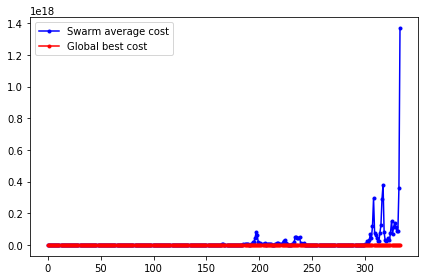

Best particle: [0.99999555 2.00120615]
Best cost: 1.454808581717445e-06


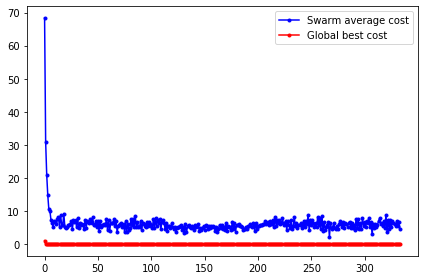

In [90]:
# Executar o algoritmo
pso_quad = PSO(quad_func, [-10,-10] , [10,10], max_feval=10000, swarm_size=30, acceleration=[1.5, 1.5], constrition=1.0, inertia=1.0)
# sem velocity clamping
_ = pso_quad.run(max_velocity=None) 
# com velocity clamping
_ = pso_quad.run(max_velocity=3.0) 

A execução do algoritmo para parâmetros de constrição e peso de inércia com valores diferentes de 1.0 podem ser vistos abaixo, para as abordagens `gbest` e `lbest`. O velocity clamping foi desabilitado nas duas execuções. 

Best particle: [0.99998141 1.99992408]
Best cost: 6.109151101798362e-09


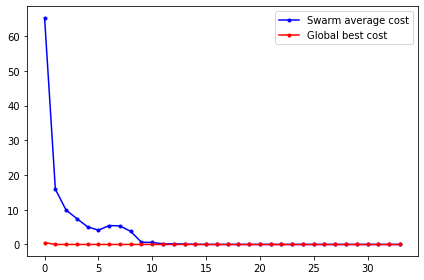

Best particle: [0.99999011 1.99997676]
Best cost: 6.380500200229043e-10


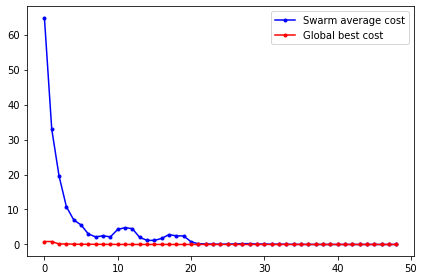

In [91]:
# Executar o algoritmo
pso_quad = PSO(quad_func, [-10,-10] , [10,10], max_feval=10000, swarm_size=30, acceleration=[1.5, 1.5], constrition=0.73, inertia=0.7)
_ = pso_quad.run(max_velocity=None) 

pso_quad = PSO(quad_func, [-10,-10] , [10,10], max_feval=10000, swarm_size=30, acceleration=[1.5, 1.5], constrition=0.73, inertia=0.7, topology='lbest')
_ = pso_quad.run(max_velocity=None) 

A partir dos resultados anteriores, é possível constatar que o algoritmo consegue convergir com facilidade para uma funçao simples de teste para as estruturas de vizinhança `gbest` e `lbest (anel)`. Dessa forma, é possível considerar sua implementação como validada. 

## Resultados
Inicialmente é necessário importar os dados necessários e definir as variáveis para as instâncias do problema a serem estudadas.

In [59]:
# Ler a matriz M
M_D10 = pd.read_fwf('data/M_D10.txt', header=None)

# Definições padrões para os testes
D = 10
n_executions = 31
max_fevals = 100000
ub = [100]*D
lb = [-100]*D

# selecionar um único valor de shift
o_test = shift_data.iloc[0, :D].to_numpy()
# selecionar matriz de rotação
M1 = M_D10.iloc[:D, :].to_numpy()

Em seguida, basta instanciar um objeto único que representa cada função de avaliação com os dados importados.

In [60]:
# Função unimodal
unimodal = DifferentPowersFunction(o_test, D=D)
# Funcão multimodal
multimodal = RotatedGriewanksFunction(o_test, M1, D=D)

Best particle: [-20.63584874  12.23312963 -34.27146377  64.16441673 -37.43937229
 -51.75640369  53.20047302  11.68675981  70.44975322 -19.7657196 ]
Best cost: -496.86508347787895


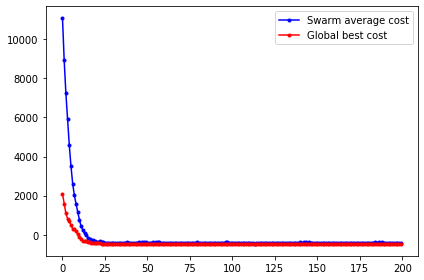

Best particle: [-21.69448104   3.74279815 -33.80186876  75.66990855 -39.84580654
 -43.2577525   51.79325117  22.98312035  70.35024248 -20.63081502]
Best cost: -490.59198763312537


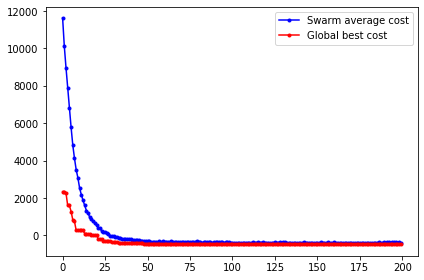

In [92]:
pso_lbest = PSO(multimodal.func, lb, ub, max_feval=10000, swarm_size=50, acceleration=[1.5, 1.5], constrition = 1.0, inertia = 1.0, topology='lbest')
pso_gbest = PSO(multimodal.func, lb, ub, max_feval=10000, swarm_size=50, acceleration=[1.5, 1.5], constrition = 1.0, inertia = 1.0, topology='gbest')

_ = pso_gbest.run(debug=True, max_velocity=10, f_star=multimodal.f_star)
_ = pso_lbest.run(debug=True, max_velocity=10, f_star=multimodal.f_star)

Como forma de entender como cada hiper-parâmetro existente afeta o desempenho do algoritmo PSO para cada uma das estruturas de vizinhança, a seguir serão avaliados os parâmetros tamanho da população e coeficientes de aceleração. Por meio da análise dos resultados, serão definidos os valores que consigam um bom desempenho para as duas estruturas de vizinhança, os quais serão posteriormente utilizados na análise proposta para os parâmetros de constrição e peso de inércia. 

Inicialmente, é definida uma função de apoio responsável por executar de forma fácil um experimento variando os hiperparâmetros disponíveis, e também para gerar os relatórios que sejam relevantes. 


In [96]:
def run_experiment(func, constrition = 0.7, inertia = 0.7, n_runs = 31, max_feval=10000, swarm_size=30, acceleration=[1.5, 1.5], f_star=None, max_velocity=None):
    data = np.zeros((n_runs, 2))
    data_progress_gbest = []
    data_progress_lbest = []
    pso_lbest = PSO(func, lb, ub, max_feval, swarm_size, acceleration, constrition, inertia, topology='lbest')
    pso_gbest = PSO(func, lb, ub, max_feval, swarm_size, acceleration, constrition, inertia, topology='gbest')
    
    for i in range(n_runs):
        best_solution_lbest, best_cost_lbest, global_best_lbest, _ = pso_lbest.run(debug=False, f_star=f_star, max_velocity=max_velocity)
        best_solution_gbest, best_cost_gbest, global_best_gbest, _ = pso_gbest.run(debug=False, f_star=f_star, max_velocity=max_velocity)

        data_progress_gbest.append(np.array(global_best_gbest))
        data_progress_lbest.append(np.array(global_best_lbest))

        data[i,0] = best_cost_lbest
        data[i,1] = best_cost_gbest
    
    results = pd.DataFrame(data, columns=['lbest', 'gbest'])
    results['constrition'] = [constrition] * n_runs
    results['inertia'] = [inertia] * n_runs
    results['swarm_size'] = [swarm_size] * n_runs
    results['acceleration_1'] = [acceleration[0]] * n_runs
    results['acceleration_2'] = [acceleration[1]] * n_runs

    return results, pd.DataFrame(data_progress_gbest).T, pd.DataFrame(data_progress_lbest).T

def plot_experiment_results(gbest_results, lbest_results):
    n_results = len(gbest_results)
    fig, ax = plt.subplots(n_results, 2, figsize=(12,8))

    for i in range(n_results): 
        gbest = gbest_results[i]  
        lbest = lbest_results[i]

        mean_gbest = gbest.apply(np.mean, axis=1)
        mean_lbest = lbest.apply(np.mean, axis=1)
        x_gbest = range(1, mean_gbest.shape[0] + 1)
        x_lbest = range(1, mean_lbest.shape[0] + 1)

        std_gbest = gbest.apply(np.std, axis=1)
        std_lbest = lbest.apply(np.std, axis=1)

        ax[i, 0].plot(x_gbest, mean_gbest)
        ax[i, 0].fill_between(x_gbest, mean_gbest + std_gbest, mean_gbest - std_gbest, alpha=0.5)

        ax[i, 1].plot(x_lbest, mean_lbest, 'r')
        ax[i, 1].fill_between(x_lbest, mean_lbest + std_lbest, mean_lbest - std_lbest, alpha=0.5, color='red')

        if(i == 0):
            ax[i, 0].set_title('gbest')
            ax[i, 1].set_title('lbest')

    plt.show()

def generate_experiment_statistics(experiments, group_name):
    all_data = pd.concat(experiments, ignore_index=True)
    stats = all_data.groupby(group_name)[['lbest', 'gbest']].aggregate([np.mean, np.std])
    display(stats)


### Tamanho da população

Para este experimento, serão consideradas populações de tamanho 10, 30, 50 e 100. Os demais parâmetros serão mantidos fixos em seus valores padrão, conforme definidos na assinatura da função `run_experiment`.

In [80]:
# execute the experiment
swarm_sizes = [10, 30, 50, 100]
results_multimodal = []
results_unimodal = []
for swarm_size in swarm_sizes:
    print('Swarm size: {}'.format(coef))
    results_unimodal.append(run_experiment(unimodal.func, swarm_size=swarm_size))
    results_multimodal.append(run_experiment(multimodal.func, swarm_size=swarm_size))

In [81]:
# unimodal function statistics
print('\nEstatísticas para função unimodal')
generate_experiment_statistics([value[0] for value in results_unimodal], ['swarm_size'])

# multimodal function statistics
print('\nEstatísticas para função multimodal')
generate_experiment_statistics([value[0] for value in results_multimodal], ['swarm_size'])


Estatísticas para função unimodal


lbest                     gbest             
                   mean          std         mean          std
swarm_size                                                    
10          1318.593846  2831.995194  1710.237327  3193.806532
30          -935.155380    71.038804  -872.809119   100.853341
50          -995.051027     9.124995  -965.640697    41.878693
100         -996.386266     5.433876  -997.496696     4.281943


Estatísticas para função multimodal


lbest                   gbest            
                  mean         std        mean         std
swarm_size                                                
10         -328.225128  124.109235  -31.831469  287.415939
30         -491.939102   11.190567 -429.843828   46.916379
50         -498.537370    1.427810 -474.314394   23.079434
100        -497.224227    1.302803 -493.059939    8.568309

Para as duas funções, as duas abordagens conseguem chegar mais próximo ao mínimo global com uma população de pelo menos 50 partículas, dados os valores de média e desvio padrão exibidos nas tabelas acima. Portanto, este valor será considerado para o tamanho da populaão dos demais experimentos. É interessante notar a abordagem `lbest` apresentou melhor desempenho para o conjunto de parâmetros padrão.


### Coeficientes de aceleração

Para este experimento, serão consideradas os coeficientes de aceleração `1.0`, `1.33`, `1.66`, `2.0`. Os demais parâmetros serão mantidos fixos em seus valores padrão, conforme definidos na assinatura da função `run_experiment`.


In [82]:
# execute the experiment
accel_coef = [1.0, 1.33, 1.66, 2.0]
results_multimodal_accel = []
results_unimodal_accel = []
for coef in accel_coef:
    print('Acceleration: {}'.format(coef))
    results_unimodal_accel.append(run_experiment(unimodal.func, swarm_size=50, acceleration=[coef, coef]))
    results_multimodal_accel.append(run_experiment(multimodal.func, swarm_size=50, acceleration=[coef, coef]))

In [83]:
# unimodal function statistics
print('\nEstatísticas para função unimodal')
generate_experiment_statistics([value[0] for value in results_unimodal_accel], ['acceleration_1','acceleration_2'])

# multimodal function statistics
print('\nEstatísticas para função multimodal')
generate_experiment_statistics([value[0] for value in results_multimodal_accel], ['acceleration_1','acceleration_2'])


Estatísticas para função unimodal


lbest                   gbest            
                                     mean         std        mean         std
acceleration_1 acceleration_2                                                
1.00           1.00           -747.878907  212.181169 -569.320085  506.060063
1.33           1.33           -952.412196   74.126952 -895.688207  120.348786
1.66           1.66           -999.630037    1.624330 -995.910157    6.514147
2.00           2.00           -999.952657    0.051923 -999.998822    0.005203


Estatísticas para função multimodal


lbest                  gbest           
                                     mean        std        mean        std
acceleration_1 acceleration_2                                              
1.00           1.00           -476.386275  21.694314 -430.642969  72.715928
1.33           1.33           -496.558867   4.168941 -463.148128  32.751593
1.66           1.66           -498.836625   0.741910 -483.200959  15.614581
2.00           2.00           -494.348902   5.831039 -494.040437  12.262456

Através dos resultados obtidos, nota-se que maiores valores para os coeficientes de aceleração favorece que soluções mais próximas ao mínimo global sejam encontradas. Portanto, para os demais testes será considerado um valor de 1.7 para $c_1$ e $c_2$.

### Constrição e peso de inércia

A seguir são apresentados os resultados para o experimento de comparação entre diferentes valores de constrição e peso de inércia.


In [102]:
# execute the experiment
parameters = [{'inertia': 1, 'constrition': 1, 'max_velocity': 10.0}, {'inertia': 0.7, 'constrition': 1, 'max_velocity': 10.0}, {'inertia': 1, 'constrition': 0.73, 'max_velocity': 10.0}, {'inertia': 0.7, 'constrition': 0.73, 'max_velocity': None}]
results_unimodal = []
for params in parameters:
    print(params)
    results_unimodal.append(run_experiment(unimodal.func, f_star=unimodal.f_star, swarm_size=50, acceleration=[1.7, 1.7], max_feval=max_fevals, constrition=params['constrition'], inertia=params['inertia'], max_velocity=params['max_velocity']))

{'inertia': 1, 'constrition': 1, 'max_velocity': 10.0}
{'inertia': 0.7, 'constrition': 1, 'max_velocity': 10.0}
{'inertia': 1, 'constrition': 0.73, 'max_velocity': 10.0}
{'inertia': 0.7, 'constrition': 0.73, 'max_velocity': None}


In [103]:
# execute the experiment
parameters = [{'inertia': 1, 'constrition': 1, 'max_velocity': 10.0}, {'inertia': 0.7, 'constrition': 1, 'max_velocity': 10.0}, {'inertia': 1, 'constrition': 0.73, 'max_velocity': 10.0}, {'inertia': 0.7, 'constrition': 0.73, 'max_velocity': None}]
results_multimodal = []
for params in parameters:
    print(params)
    results_multimodal.append(run_experiment(multimodal.func, f_star=multimodal.f_star, swarm_size=50, acceleration=[1.7, 1.7], max_feval=max_fevals, constrition=params['constrition'], inertia=params['inertia'], max_velocity=params['max_velocity']))

{'inertia': 1, 'constrition': 1, 'max_velocity': 10.0}
{'inertia': 0.7, 'constrition': 1, 'max_velocity': 10.0}
{'inertia': 1, 'constrition': 0.73, 'max_velocity': 10.0}
{'inertia': 0.7, 'constrition': 0.73, 'max_velocity': None}


In [104]:
# unimodal function statistics
print('\nEstatísticas para função unimodal')
generate_experiment_statistics([value[0] for value in results_unimodal], ['constrition','inertia'])

# multimodal function statistics
print('\nEstatísticas para função multimodal')
generate_experiment_statistics([value[0] for value in results_multimodal], ['constrition','inertia'])


Estatísticas para função unimodal


lbest                 gbest           
                           mean       std        mean        std
constrition inertia                                             
0.73        0.7     -998.041046  5.815930 -993.376932  17.532467
            1.0     -999.120827  0.088088 -999.140463   0.112782
1.00        0.7     -999.101844  0.124303 -999.093749   0.118142
            1.0     -988.737937  3.073196 -990.226459   2.388800


Estatísticas para função multimodal


lbest                 gbest          
                           mean       std        mean       std
constrition inertia                                            
0.73        0.7     -499.475005  0.128831 -487.205843  8.751222
            1.0     -499.463981  0.185624 -499.249173  0.313048
1.00        0.7     -499.445309  0.161589 -499.151090  0.414218
            1.0     -496.611844  0.600413 -496.835465  0.641870

Através dos resultados na tabela acima, é possível concluir que para todas as configurações avaliadas o algoritmo PSO apresentou excelentes resultados, independente da estrutura de vizinhança considerada. O algoritmo foi capaz de chegar bem próximo do mínimo global da função, o que além disso ocorreu com bastante frequência vide o desvio padrão da melhor função objetivo encontrada em cada caso.

In [106]:
print(results_unimodal[3][1])

                0              1              2              3   \
0    529048.705961  667767.500158  422101.186863  449289.959290   
1     95669.251705  168453.202680   94050.194535  117086.687790   
2    105483.092546   92866.229851  110009.360475   80174.408672   
3     90097.063735   44006.139067   40950.984993   38212.411401   
4     53736.902874   23584.860136   56316.386145   23604.000826   
..             ...            ...            ...            ...   
254            NaN            NaN            NaN            NaN   
255            NaN            NaN            NaN            NaN   
256            NaN            NaN            NaN            NaN   
257            NaN            NaN            NaN            NaN   
258            NaN            NaN            NaN            NaN   

                4              5              6              7   \
0    577349.538998  639729.614224  548131.350124  677236.395495   
1    184424.793971  114769.536667   95277.327834  184089.1930

## Conclusão

Neste trabalho foi feita a implementação do algoritmo PSO e aplicou-se o algoritmo a uma função de benchmark unimodal e multimodal disponível na literatura. O efeito dos hiperparâmetros tamanho da população, coeficientes de aceleração, constrição e peso de inércia foram avaliados sobre estas duas funções. 

O aumento do tamanho da população favorece a convergência do algoritmo para o mínimo global, entretanto foi constatado que valores na faixa de 50 indivíduos eram suficientes para um bom desempenho. Já para o coeficiente de aceleração, os resultados mostram que valores próximos de 1.7 são ideais para as funções em estudo. Utilizando estes resultados, um último experimento foi executado variando os parâmetros de constrição e peso de inércia. 

Um primeiro resultado importante foi a necessidade de aplicar limites para a velocidade das partículas, de forma a evitar sua explosão quando o peso de inércia e constrição possuem valores próximos de 1. A adição deste limitante permitiu com que a população fosse mantida dentro da região viável, porém apresentando comportamento oscilatório ao longo das gerações. Os resultados obtidos mostraram que independente da configuração de hiper-parâmetros, o algoritmo apresentou excelentes resultados, chegando muito próximo do ótimo global na maioria das execuções.

Como melhorias e trabalhos futuros, seria interessante aplicar a técnica de reflexão para tratar as restrições de caixa do problema. Atualmente ele pode sair da região viável, porém foi constatado que esse comportamento não impedia o seu correto funcionamento. Outros pontos a serem avaliados seria também o uso de técnicas para variar dinamicamente os hiper-parâmetros.

-## Referências

[[1]] J. J. Liang, B-Y. Qu, P. N. Suganthan, Alfredo G. Hern´andez-D´ıaz, "Problem Definitions and Evaluation
Criteria for the CEC 2013 Special Session and Competition on Real-Parameter Optimization", Technical Report 201212, Computational Intelligence Laboratory, Zhengzhou University, Zhengzhou China and
Technical Report, Nanyang Technological University, Singapore, January 2013.